In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
x=pd.read_csv("Churn.csv")

In [5]:
x.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
x.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
x.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
x.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

In [17]:
type(x)

pandas.core.frame.DataFrame

In [20]:
x.set_index("state",inplace=True)

In [21]:
x

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


<AxesSubplot:>

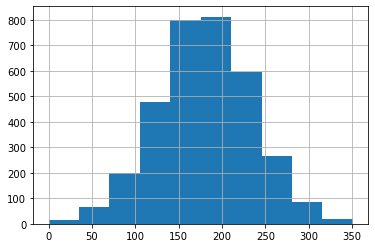

In [28]:
x["total day minutes"].hist()

<AxesSubplot:ylabel='Frequency'>

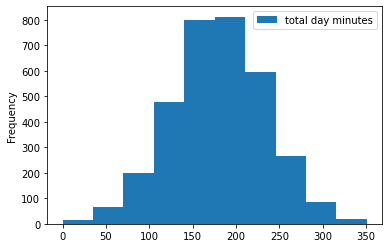

In [33]:
x.plot(kind="hist",y="total day minutes")

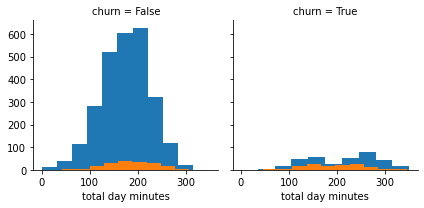

In [36]:
s=sns.FacetGrid(data=x,
    row=None,
    col="churn",
    hue="international plan")
s.map(plt.hist,"total day minutes")

In [39]:
x["voice mail plan"]

state
KS    yes
OH    yes
NJ     no
OH     no
OK     no
     ... 
AZ    yes
WV     no
RI     no
CT     no
TN    yes
Name: voice mail plan, Length: 3333, dtype: object

<AxesSubplot:>

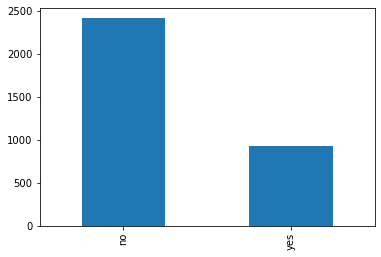

In [47]:
x["voice mail plan"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Density'>

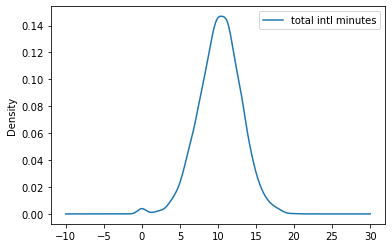

In [50]:
x.plot(kind="kde",y="total intl minutes")

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

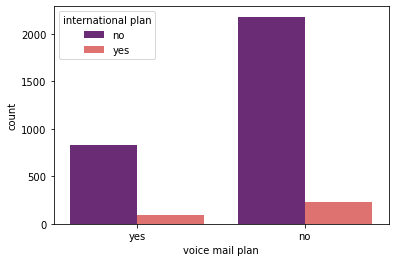

In [59]:
sns.countplot(x="voice mail plan",
    hue="international plan",
    data=x,palette="magma")

<AxesSubplot:xlabel='international plan', ylabel='area code'>

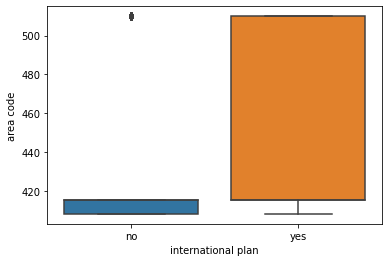

In [61]:
sns.boxplot(data=x,x="international plan",y="area code")

In [77]:
pd.crosstab(index=x["area code"],columns="count" )

col_0,count
area code,
408,838
415,1655
510,840


In [80]:
pd.crosstab(x["area code"],x["churn"])

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


In [88]:
pd.pivot_table(data=x,
    values=None,
    index="area code",
    columns="international plan",
    aggfunc=len,
    margins=True)

account length            churn             \
international plan             no  yes   All    no  yes   All   
area code                                                       
408                           767   71   838   767   71   838   
415                          1505  150  1655  1505  150  1655   
510                           738  102   840   738  102   840   
All                          3010  323  3333  3010  323  3333   

                   customer service calls            number vmail messages  \
international plan                     no  yes   All                    no   
area code                                                                    
408                                   767   71   838                   767   
415                                  1505  150  1655                  1505   
510                                   738  102   840                   738   
All                                  3010  323  3333                  3010   

                    ... total night calls total night charge                 \
international plan  ...               All                 no    yes     All   
area code           ...                                                       
408                 ...               838              767.0   71.0   838.0   
415                 ...              1655             1505.0  150.0  1655.0   
510                 ...               840              738.0  102.0   840.0   
All                 ...              3333             3010.0  323.0  3333.0   

                   total night minutes                voice mail plan       \
international plan                  no    yes     All              no  yes   
area code                                                                    
408                              767.0   71.0   838.0             767   71   
415                             1505.0  150.0  1655.0            1505  150   
510                              738.0  102.0   840.0             738  102   
All                             3010.0  323.0  3333.0            3010  323   

                          
international plan   All  
area code                 
408                  838  
415                 1655  
510                  840  
All                 3333  

[4 rows x 54 columns]

In [91]:
pd.pivot_table(data=x,
    values="total intl minutes",
    index="area code",
    columns="international plan",
    aggfunc="sum",
    margins=True)

international plan,no,yes,All
area code,,,
408,7719.6,766.3,8485.9
415,15499.3,1619.1,17118.4
510,7469.1,1047.5,8516.6
All,30688.0,3432.9,34120.9


In [98]:
pd.pivot_table(data=x,index="area code" ,columns=["international plan"] ,values="total intl minutes", aggfunc="sum")

international plan,no,yes
area code,,
408,7719.6,766.3
415,15499.3,1619.1
510,7469.1,1047.5


<AxesSubplot:>

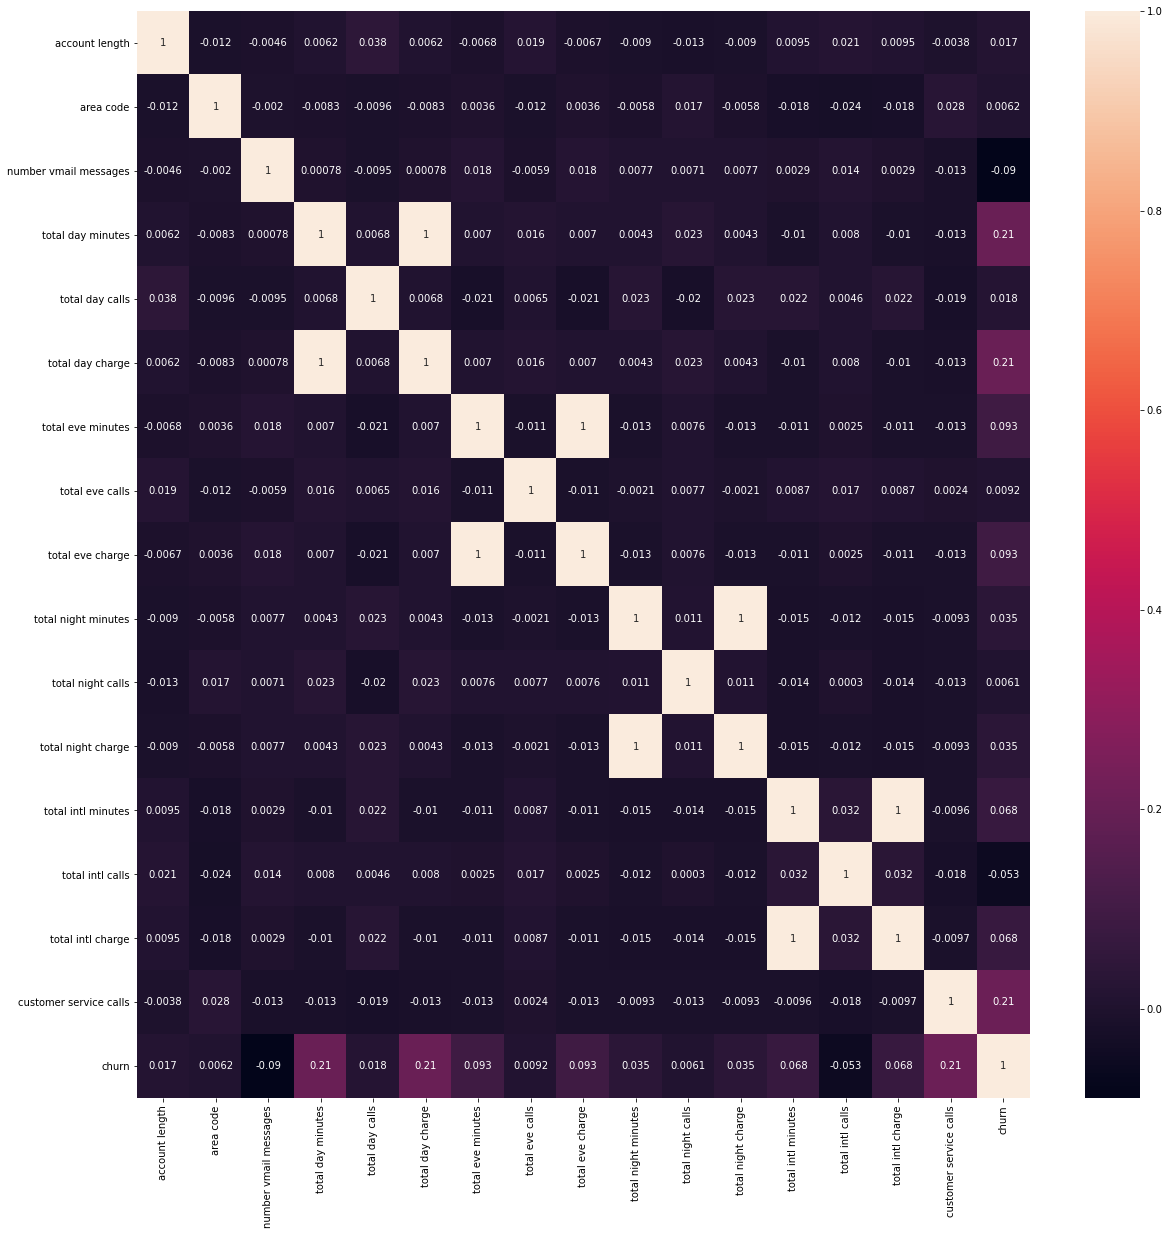

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(data=x.corr() ,annot=True)

In [104]:
x["total night calls"].std()

19.568609346058615

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total night calls', ylabel='Density'>

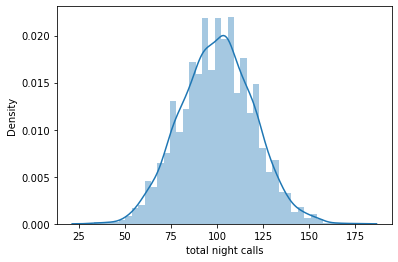

In [105]:
sns.distplot(x["total night calls"])

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

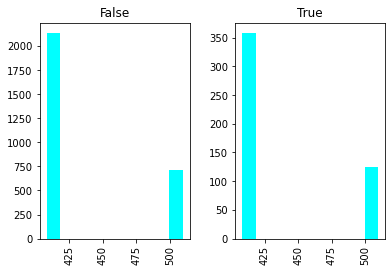

In [110]:
x.hist(by="churn", column="area code", color="cyan")

<AxesSubplot:xlabel='area code', ylabel='count'>

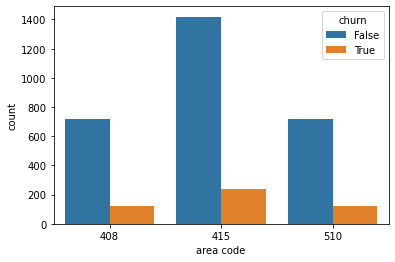

In [118]:
sns.countplot(x["area code"],hue=x["churn"])